### Importing the dependencies

In [16]:
import pandas as pd
from datetime import datetime
import pandas_datareader as pdr
import matplotlib.pyplot as plt

### importing pandas datareader amazon shares.

In [4]:
df_amzn = pdr.get_data_tiingo('AMZN', api_key='01b8bd39390613557a17b422395cc4d6c335963a')

C:\Users\Kiran TR\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [5]:
df_amzn.to_csv('AMZN.csv')

In [6]:
df_amzn = pd.read_csv('AMZN.csv')

In [7]:
df_amzn.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AMZN,2017-11-24 00:00:00+00:00,1186.00,1186.84,1160.70,1160.70,3526582,59.3000,59.3420,58.0350,58.035,70531640,0.0,1.0
1,AMZN,2017-11-27 00:00:00+00:00,1195.83,1213.41,1191.15,1202.66,6701343,59.7915,60.6705,59.5575,60.133,134026860,0.0,1.0
2,AMZN,2017-11-28 00:00:00+00:00,1193.60,1205.34,1188.52,1204.88,4463476,59.6800,60.2670,59.4260,60.244,89269520,0.0,1.0
3,AMZN,2017-11-29 00:00:00+00:00,1161.27,1194.80,1145.19,1194.80,9239087,58.0635,59.7400,57.2595,59.740,184781740,0.0,1.0
4,AMZN,2017-11-30 00:00:00+00:00,1176.75,1178.57,1160.00,1167.10,4470183,58.8375,58.9285,58.0000,58.355,89403660,0.0,1.0


In [8]:
df_amzn.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AMZN,2022-11-15 00:00:00+00:00,98.94,103.7900,97.34,103.21,111336317,98.94,103.7900,97.34,103.21,111336317,0.0,1.0
1253,AMZN,2022-11-16 00:00:00+00:00,97.12,98.4879,95.54,96.85,87958828,97.12,98.4879,95.54,96.85,87958828,0.0,1.0
1254,AMZN,2022-11-17 00:00:00+00:00,94.85,96.9700,94.03,95.37,82617865,94.85,96.9700,94.03,95.37,82617865,0.0,1.0
1255,AMZN,2022-11-18 00:00:00+00:00,94.14,95.9900,92.48,95.95,72428185,94.14,95.9900,92.48,95.95,72428185,0.0,1.0
1256,AMZN,2022-11-21 00:00:00+00:00,92.46,95.0200,90.59,93.97,84330270,92.46,95.0200,90.59,93.97,84330270,0.0,1.0


In [9]:
df_amzn.shape

(1257, 14)

In [12]:
df1=df_amzn.reset_index()['close']

In [13]:
df1.shape

(1257,)

In [14]:
df1.head()

0    1186.00
1    1195.83
2    1193.60
3    1161.27
4    1176.75
Name: close, dtype: float64

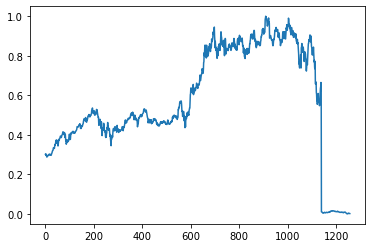

In [23]:
plt.plot(df1)

### MinMax Scalar to transform

In [19]:
import numpy as np

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [22]:
df1

array([[0.30172251],
       [0.30441915],
       [0.3038074 ],
       ...,
       [0.0023894 ],
       [0.00219462],
       [0.00173375]])

### Splitting dataset into train and test split

In [25]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]



In [26]:
training_size,test_size

(817, 440)

In [28]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [29]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [30]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [31]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [32]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### Create the Stacked LSTM model

In [33]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [34]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
12/12 [==============================] - 18s 482ms/step - loss: 0.0859 - val_loss: 0.0400
Epoch 2/100
12/12 [==============================] - 3s 262ms/step - loss: 0.0130 - val_loss: 0.0301
Epoch 3/100
12/12 [==============================] - 3s 253ms/step - loss: 0.0063 - val_loss: 0.0228
Epoch 4/100
12/12 [==============================] - 3s 292ms/step - loss: 0.0029 - val_loss: 0.0179
Epoch 5/100
12/12 [==============================] - 3s 255ms/step - loss: 0.0018 - val_loss: 0.0155
Epoch 6/100
12/12 [==============================] - 3s 226ms/step - loss: 0.0012 - val_loss: 0.0146
Epoch 7/100
12/12 [==============================] - 3s 234ms/step - loss: 0.0010 - val_loss: 0.0141
Epoch 8/100
12/12 [==============================] - 3s 213ms/step - loss: 9.9241e-04 - val_loss: 0.0133
Epoch 9/100
12/12 [==============================] - 3s 222ms/step - loss: 0.0010 - val_loss: 0.0127
Epoch 10/100
12/12 [==============================] - 3s 226ms/step - loss: 9.9079e-04

Epoch 79/100
12/12 [==============================] - 3s 223ms/step - loss: 6.5535e-04 - val_loss: 0.0074
Epoch 80/100
12/12 [==============================] - 3s 223ms/step - loss: 6.9164e-04 - val_loss: 0.0082
Epoch 81/100
12/12 [==============================] - 3s 248ms/step - loss: 7.1705e-04 - val_loss: 0.0081
Epoch 82/100
12/12 [==============================] - 3s 241ms/step - loss: 6.8947e-04 - val_loss: 0.0069
Epoch 83/100
12/12 [==============================] - 3s 256ms/step - loss: 5.7444e-04 - val_loss: 0.0072
Epoch 84/100
12/12 [==============================] - 3s 238ms/step - loss: 5.7153e-04 - val_loss: 0.0079
Epoch 85/100
12/12 [==============================] - 3s 222ms/step - loss: 6.5610e-04 - val_loss: 0.0073
Epoch 86/100
12/12 [==============================] - 3s 220ms/step - loss: 5.9214e-04 - val_loss: 0.0066
Epoch 87/100
12/12 [==============================] - 3s 250ms/step - loss: 6.3334e-04 - val_loss: 0.0066
Epoch 88/100
12/12 [==========================

In [38]:
import tensorflow as tf

In [39]:

tf.__version__

'2.10.0'

In [40]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 56ms/step


In [41]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [42]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2286.5693978220115

In [43]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

2667.8054516284806

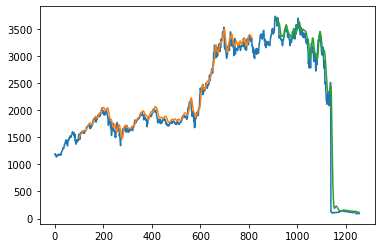

In [44]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [45]:
len(test_data)

440

In [46]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [47]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [48]:
temp_input

[0.0075056168678863285,
 0.007733309192460368,
 0.008281965396253227,
 0.00806524619575505,
 0.007025542689567576,
 0.006331492591769607,
 0.006655199752007398,
 0.006718295215443572,
 0.007519333272981148,
 0.007576942174379403,
 0.008797702227818512,
 0.010048638372466237,
 0.010558888641993593,
 0.009952623536802485,
 0.009601483566375052,
 0.007864986681370652,
 0.009554847789052662,
 0.009914217602536989,
 0.013389954653564753,
 0.01351065901839918,
 0.013173235453066576,
 0.014643634079231443,
 0.015480334790015551,
 0.014994774049658877,
 0.014613457988022834,
 0.014180019587026478,
 0.015513254162243126,
 0.014950881553355437,
 0.015749176329874055,
 0.015647674932172374,
 0.016086599895206666,
 0.015351400582124232,
 0.015406266202503523,
 0.014289750827785046,
 0.01291536703728393,
 0.013025098278042505,
 0.013074477336383866,
 0.014029139130983435,
 0.012237776625599751,
 0.011974421647779177,
 0.011683633859768956,
 0.011145950780051955,
 0.011433995287043204,
 0.0113489535

In [68]:
# demonstrate prediction for next 100 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<100):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.0153514  0.01540627 0.01428975 0.01291537 0.0130251  0.01307448
 0.01402914 0.01223778 0.01197442 0.01168363 0.01114595 0.011434
 0.01134895 0.01096489 0.01188938 0.01198265 0.01292908 0.01380145
 0.01115967 0.01163425 0.01101153 0.01025713 0.01056712 0.00988953
 0.00888823 0.00855081 0.00758243 0.00795826 0.00775526 0.00874284
 0.00786224 0.00736845 0.00815852 0.00958777 0.00954936 0.00937105
 0.0077964  0.00755225 0.00715173 0.00734102 0.00723952 0.00569505
 0.00758517 0.0082902  0.00793631 0.00798569 0.00910221 0.00923937
 0.00945335 0.00809817 0.00680882 0.00473765 0.00447155 0.00292159
 0.00164048 0.00086688 0.00132775 0.0012043  0.00105342 0.
 0.0028777  0.00401891 0.00338795 0.0035114  0.00301212 0.0023894
 0.00219462 0.00173375 0.00800378 0.00800378 0.00847267 0.00890594
 0.00945188 0.01008014 0.01076025 0.01146648 0.0121796  0.01288666
 0.01358001 0.01425592 0.01491327 0.01555254 0.01617507 0.01678247
 0.01737641 0.01795842 0.01852984 0.0190918  0.01964526 0.020

8 day output [[0.02957483]]
9 day input [0.01168363 0.01114595 0.011434   0.01134895 0.01096489 0.01188938
 0.01198265 0.01292908 0.01380145 0.01115967 0.01163425 0.01101153
 0.01025713 0.01056712 0.00988953 0.00888823 0.00855081 0.00758243
 0.00795826 0.00775526 0.00874284 0.00786224 0.00736845 0.00815852
 0.00958777 0.00954936 0.00937105 0.0077964  0.00755225 0.00715173
 0.00734102 0.00723952 0.00569505 0.00758517 0.0082902  0.00793631
 0.00798569 0.00910221 0.00923937 0.00945335 0.00809817 0.00680882
 0.00473765 0.00447155 0.00292159 0.00164048 0.00086688 0.00132775
 0.0012043  0.00105342 0.         0.0028777  0.00401891 0.00338795
 0.0035114  0.00301212 0.0023894  0.00219462 0.00173375 0.00800378
 0.00800378 0.00847267 0.00890594 0.00945188 0.01008014 0.01076025
 0.01146648 0.0121796  0.01288666 0.01358001 0.01425592 0.01491327
 0.01555254 0.01617507 0.01678247 0.01737641 0.01795842 0.01852984
 0.0190918  0.01964526 0.02019101 0.02072972 0.02126195 0.02178818
 0.0223088  0.02282414

17 day output [[0.0334993]]
18 day input [0.01115967 0.01163425 0.01101153 0.01025713 0.01056712 0.00988953
 0.00888823 0.00855081 0.00758243 0.00795826 0.00775526 0.00874284
 0.00786224 0.00736845 0.00815852 0.00958777 0.00954936 0.00937105
 0.0077964  0.00755225 0.00715173 0.00734102 0.00723952 0.00569505
 0.00758517 0.0082902  0.00793631 0.00798569 0.00910221 0.00923937
 0.00945335 0.00809817 0.00680882 0.00473765 0.00447155 0.00292159
 0.00164048 0.00086688 0.00132775 0.0012043  0.00105342 0.
 0.0028777  0.00401891 0.00338795 0.0035114  0.00301212 0.0023894
 0.00219462 0.00173375 0.00800378 0.00800378 0.00847267 0.00890594
 0.00945188 0.01008014 0.01076025 0.01146648 0.0121796  0.01288666
 0.01358001 0.01425592 0.01491327 0.01555254 0.01617507 0.01678247
 0.01737641 0.01795842 0.01852984 0.0190918  0.01964526 0.02019101
 0.02072972 0.02126195 0.02178818 0.0223088  0.02282414 0.0233345
 0.02384007 0.02434107 0.02483764 0.02532987 0.02581787 0.02630171
 0.02678142 0.02725705 0.027728

26 day output [[0.03712496]]
27 day input [0.00795826 0.00775526 0.00874284 0.00786224 0.00736845 0.00815852
 0.00958777 0.00954936 0.00937105 0.0077964  0.00755225 0.00715173
 0.00734102 0.00723952 0.00569505 0.00758517 0.0082902  0.00793631
 0.00798569 0.00910221 0.00923937 0.00945335 0.00809817 0.00680882
 0.00473765 0.00447155 0.00292159 0.00164048 0.00086688 0.00132775
 0.0012043  0.00105342 0.         0.0028777  0.00401891 0.00338795
 0.0035114  0.00301212 0.0023894  0.00219462 0.00173375 0.00800378
 0.00800378 0.00847267 0.00890594 0.00945188 0.01008014 0.01076025
 0.01146648 0.0121796  0.01288666 0.01358001 0.01425592 0.01491327
 0.01555254 0.01617507 0.01678247 0.01737641 0.01795842 0.01852984
 0.0190918  0.01964526 0.02019101 0.02072972 0.02126195 0.02178818
 0.0223088  0.02282414 0.0233345  0.02384007 0.02434107 0.02483764
 0.02532987 0.02581787 0.02630171 0.02678142 0.02725705 0.02772865
 0.0281962  0.02865973 0.02911927 0.02957483 0.03002642 0.03047406
 0.03091778 0.031357

35 day output [[0.04048138]]
36 day input [0.0077964  0.00755225 0.00715173 0.00734102 0.00723952 0.00569505
 0.00758517 0.0082902  0.00793631 0.00798569 0.00910221 0.00923937
 0.00945335 0.00809817 0.00680882 0.00473765 0.00447155 0.00292159
 0.00164048 0.00086688 0.00132775 0.0012043  0.00105342 0.
 0.0028777  0.00401891 0.00338795 0.0035114  0.00301212 0.0023894
 0.00219462 0.00173375 0.00800378 0.00800378 0.00847267 0.00890594
 0.00945188 0.01008014 0.01076025 0.01146648 0.0121796  0.01288666
 0.01358001 0.01425592 0.01491327 0.01555254 0.01617507 0.01678247
 0.01737641 0.01795842 0.01852984 0.0190918  0.01964526 0.02019101
 0.02072972 0.02126195 0.02178818 0.0223088  0.02282414 0.0233345
 0.02384007 0.02434107 0.02483764 0.02532987 0.02581787 0.02630171
 0.02678142 0.02725705 0.02772865 0.0281962  0.02865973 0.02911927
 0.02957483 0.03002642 0.03047406 0.03091778 0.03135761 0.03179358
 0.03222568 0.03265398 0.03307851 0.0334993  0.03391639 0.03432982
 0.03473965 0.03514589 0.03554

44 day output [[0.04359659]]
45 day input [0.00798569 0.00910221 0.00923937 0.00945335 0.00809817 0.00680882
 0.00473765 0.00447155 0.00292159 0.00164048 0.00086688 0.00132775
 0.0012043  0.00105342 0.         0.0028777  0.00401891 0.00338795
 0.0035114  0.00301212 0.0023894  0.00219462 0.00173375 0.00800378
 0.00800378 0.00847267 0.00890594 0.00945188 0.01008014 0.01076025
 0.01146648 0.0121796  0.01288666 0.01358001 0.01425592 0.01491327
 0.01555254 0.01617507 0.01678247 0.01737641 0.01795842 0.01852984
 0.0190918  0.01964526 0.02019101 0.02072972 0.02126195 0.02178818
 0.0223088  0.02282414 0.0233345  0.02384007 0.02434107 0.02483764
 0.02532987 0.02581787 0.02630171 0.02678142 0.02725705 0.02772865
 0.0281962  0.02865973 0.02911927 0.02957483 0.03002642 0.03047406
 0.03091778 0.03135761 0.03179358 0.03222568 0.03265398 0.03307851
 0.0334993  0.03391639 0.03432982 0.03473965 0.03514589 0.03554859
 0.03594781 0.03634359 0.03673594 0.03712496 0.03751064 0.03789303
 0.0382722  0.038648

53 day output [[0.04649443]]
54 day input [0.00164048 0.00086688 0.00132775 0.0012043  0.00105342 0.
 0.0028777  0.00401891 0.00338795 0.0035114  0.00301212 0.0023894
 0.00219462 0.00173375 0.00800378 0.00800378 0.00847267 0.00890594
 0.00945188 0.01008014 0.01076025 0.01146648 0.0121796  0.01288666
 0.01358001 0.01425592 0.01491327 0.01555254 0.01617507 0.01678247
 0.01737641 0.01795842 0.01852984 0.0190918  0.01964526 0.02019101
 0.02072972 0.02126195 0.02178818 0.0223088  0.02282414 0.0233345
 0.02384007 0.02434107 0.02483764 0.02532987 0.02581787 0.02630171
 0.02678142 0.02725705 0.02772865 0.0281962  0.02865973 0.02911927
 0.02957483 0.03002642 0.03047406 0.03091778 0.03135761 0.03179358
 0.03222568 0.03265398 0.03307851 0.0334993  0.03391639 0.03432982
 0.03473965 0.03514589 0.03554859 0.03594781 0.03634359 0.03673594
 0.03712496 0.03751064 0.03789303 0.0382722  0.03864817 0.03902097
 0.03939066 0.03975727 0.04012083 0.04048138 0.04083895 0.04119359
 0.04154533 0.0418942  0.04224

62 day output [[0.04919539]]
63 day input [0.0035114  0.00301212 0.0023894  0.00219462 0.00173375 0.00800378
 0.00800378 0.00847267 0.00890594 0.00945188 0.01008014 0.01076025
 0.01146648 0.0121796  0.01288666 0.01358001 0.01425592 0.01491327
 0.01555254 0.01617507 0.01678247 0.01737641 0.01795842 0.01852984
 0.0190918  0.01964526 0.02019101 0.02072972 0.02126195 0.02178818
 0.0223088  0.02282414 0.0233345  0.02384007 0.02434107 0.02483764
 0.02532987 0.02581787 0.02630171 0.02678142 0.02725705 0.02772865
 0.0281962  0.02865973 0.02911927 0.02957483 0.03002642 0.03047406
 0.03091778 0.03135761 0.03179358 0.03222568 0.03265398 0.03307851
 0.0334993  0.03391639 0.03432982 0.03473965 0.03514589 0.03554859
 0.03594781 0.03634359 0.03673594 0.03712496 0.03751064 0.03789303
 0.0382722  0.03864817 0.03902097 0.03939066 0.03975727 0.04012083
 0.04048138 0.04083895 0.04119359 0.04154533 0.0418942  0.04224021
 0.04258344 0.04292388 0.04326159 0.04359659 0.04392891 0.04425857
 0.04458561 0.044910

71 day output [[0.05171756]]
72 day input [0.00945188 0.01008014 0.01076025 0.01146648 0.0121796  0.01288666
 0.01358001 0.01425592 0.01491327 0.01555254 0.01617507 0.01678247
 0.01737641 0.01795842 0.01852984 0.0190918  0.01964526 0.02019101
 0.02072972 0.02126195 0.02178818 0.0223088  0.02282414 0.0233345
 0.02384007 0.02434107 0.02483764 0.02532987 0.02581787 0.02630171
 0.02678142 0.02725705 0.02772865 0.0281962  0.02865973 0.02911927
 0.02957483 0.03002642 0.03047406 0.03091778 0.03135761 0.03179358
 0.03222568 0.03265398 0.03307851 0.0334993  0.03391639 0.03432982
 0.03473965 0.03514589 0.03554859 0.03594781 0.03634359 0.03673594
 0.03712496 0.03751064 0.03789303 0.0382722  0.03864817 0.03902097
 0.03939066 0.03975727 0.04012083 0.04048138 0.04083895 0.04119359
 0.04154533 0.0418942  0.04224021 0.04258344 0.04292388 0.04326159
 0.04359659 0.04392891 0.04425857 0.04458561 0.04491007 0.04523196
 0.04555129 0.04586814 0.04618251 0.04649443 0.04680388 0.04711097
 0.04741567 0.0477180

80 day output [[0.05407684]]
81 day input [0.01555254 0.01617507 0.01678247 0.01737641 0.01795842 0.01852984
 0.0190918  0.01964526 0.02019101 0.02072972 0.02126195 0.02178818
 0.0223088  0.02282414 0.0233345  0.02384007 0.02434107 0.02483764
 0.02532987 0.02581787 0.02630171 0.02678142 0.02725705 0.02772865
 0.0281962  0.02865973 0.02911927 0.02957483 0.03002642 0.03047406
 0.03091778 0.03135761 0.03179358 0.03222568 0.03265398 0.03307851
 0.0334993  0.03391639 0.03432982 0.03473965 0.03514589 0.03554859
 0.03594781 0.03634359 0.03673594 0.03712496 0.03751064 0.03789303
 0.0382722  0.03864817 0.03902097 0.03939066 0.03975727 0.04012083
 0.04048138 0.04083895 0.04119359 0.04154533 0.0418942  0.04224021
 0.04258344 0.04292388 0.04326159 0.04359659 0.04392891 0.04425857
 0.04458561 0.04491007 0.04523196 0.04555129 0.04586814 0.04618251
 0.04649443 0.04680388 0.04711097 0.04741567 0.04771803 0.04801805
 0.04831579 0.04861122 0.04890442 0.04919539 0.04948416 0.04977074
 0.05005515 0.050337

89 day output [[0.05628733]]
90 day input [0.02072972 0.02126195 0.02178818 0.0223088  0.02282414 0.0233345
 0.02384007 0.02434107 0.02483764 0.02532987 0.02581787 0.02630171
 0.02678142 0.02725705 0.02772865 0.0281962  0.02865973 0.02911927
 0.02957483 0.03002642 0.03047406 0.03091778 0.03135761 0.03179358
 0.03222568 0.03265398 0.03307851 0.0334993  0.03391639 0.03432982
 0.03473965 0.03514589 0.03554859 0.03594781 0.03634359 0.03673594
 0.03712496 0.03751064 0.03789303 0.0382722  0.03864817 0.03902097
 0.03939066 0.03975727 0.04012083 0.04048138 0.04083895 0.04119359
 0.04154533 0.0418942  0.04224021 0.04258344 0.04292388 0.04326159
 0.04359659 0.04392891 0.04425857 0.04458561 0.04491007 0.04523196
 0.04555129 0.04586814 0.04618251 0.04649443 0.04680388 0.04711097
 0.04741567 0.04771803 0.04801805 0.04831579 0.04861122 0.04890442
 0.04919539 0.04948416 0.04977074 0.05005515 0.05033744 0.05061761
 0.05089568 0.05117168 0.05144564 0.05171756 0.05198747 0.05225539
 0.05252136 0.0527853

98 day output [[0.05836155]]
99 day input [0.02532987 0.02581787 0.02630171 0.02678142 0.02725705 0.02772865
 0.0281962  0.02865973 0.02911927 0.02957483 0.03002642 0.03047406
 0.03091778 0.03135761 0.03179358 0.03222568 0.03265398 0.03307851
 0.0334993  0.03391639 0.03432982 0.03473965 0.03514589 0.03554859
 0.03594781 0.03634359 0.03673594 0.03712496 0.03751064 0.03789303
 0.0382722  0.03864817 0.03902097 0.03939066 0.03975727 0.04012083
 0.04048138 0.04083895 0.04119359 0.04154533 0.0418942  0.04224021
 0.04258344 0.04292388 0.04326159 0.04359659 0.04392891 0.04425857
 0.04458561 0.04491007 0.04523196 0.04555129 0.04586814 0.04618251
 0.04649443 0.04680388 0.04711097 0.04741567 0.04771803 0.04801805
 0.04831579 0.04861122 0.04890442 0.04919539 0.04948416 0.04977074
 0.05005515 0.05033744 0.05061761 0.05089568 0.05117168 0.05144564
 0.05171756 0.05198747 0.05225539 0.05252136 0.05278536 0.05304744
 0.05330761 0.05356588 0.05382229 0.05407684 0.05432956 0.05458046
 0.05482956 0.055076

In [69]:
day_new=np.arange(1,101)
day_pred=np.arange(101,201)

In [70]:
len(df1)

1257

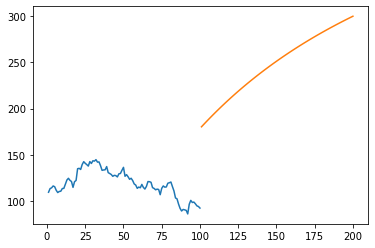

In [71]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

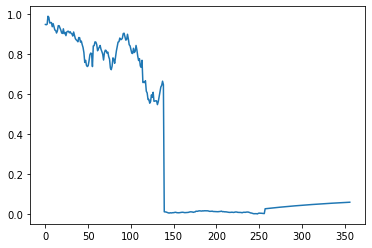

In [72]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

In [73]:
df3=scaler.inverse_transform(df3).tolist()

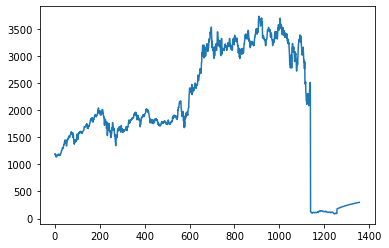

In [74]:
plt.plot(df3)